In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定数の設定
k = 10  # アームの数
n_bandits = 2000  # バンディット問題の数
n_steps = 1000  # 各バンディット問題での試行回数
epsilon = 0.1  # ε値

# バンディット問題をランダムに生成
true_action_values = np.random.normal(0, 1, (n_bandits, k))  # 各アームの真の価値 (q*)
print(true_action_values)

[[-1.10735461 -0.15895786 -0.52000004 ... -0.81873841  1.81998625
  -0.51989036]
 [-0.27323056  1.51702071 -0.54110414 ... -0.18169649  0.478895
   0.63454184]
 [-0.09019343 -0.45929971 -0.54274264 ... -0.1229475   0.21868817
   0.77623987]
 ...
 [-1.98149998  0.17345436 -1.39654895 ... -1.99738315 -2.42726901
   0.7363872 ]
 [-1.7001356  -0.06610932 -0.94987316 ...  0.94164467  1.14742706
   2.19138622]
 [-1.92892288 -0.84083047 -0.78524079 ... -0.88909494 -0.09116151
   1.53437463]]


In [2]:
true_action_values.shape

(2000, 10)

In [12]:
np.random.rand(),np.random.randint(k)

(0.131612565331922, 9)

In [29]:
# シミュレーション用の関数
def run_bandit(epsilon, greedy=False):
    rewards = np.zeros(n_steps)  # 各試行で得られる報酬
    optimal_action_counts = np.zeros(n_steps)  # 最適行動が選ばれた回数
    for bandit in range(n_bandits):
        q_estimates = np.zeros(k)  # 行動価値の推定 (Q_t(a))
        action_counts = np.zeros(k)  # 各アームが選択された回数
        
        for step in range(n_steps):
            # 行動選択
            if greedy or np.random.rand() > epsilon:  # 貪欲法またはε-グリーディ法
                action = np.argmax(q_estimates)
            else:
                action = np.random.randint(k)
            
            # 報酬の取得
            reward = np.random.normal(true_action_values[bandit, action], 1)
            rewards[step] += reward
            
            # 最適行動が選ばれたか記録
            optimal_action = np.argmax(true_action_values[bandit])
            if action == optimal_action:
                optimal_action_counts[step] += 1
            
            # 推定値の更新
            action_counts[action] += 1
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]
    
    # 試行ごとの平均を計算
    rewards /= n_bandits
    optimal_action_counts /= n_bandits
    return rewards, optimal_action_counts

In [30]:
# 貪欲法とε-グリーディ法の比較
rewards_greedy, optimal_greedy = run_bandit(epsilon=0, greedy=True)
rewards_eps, optimal_eps = run_bandit(epsilon=epsilon)


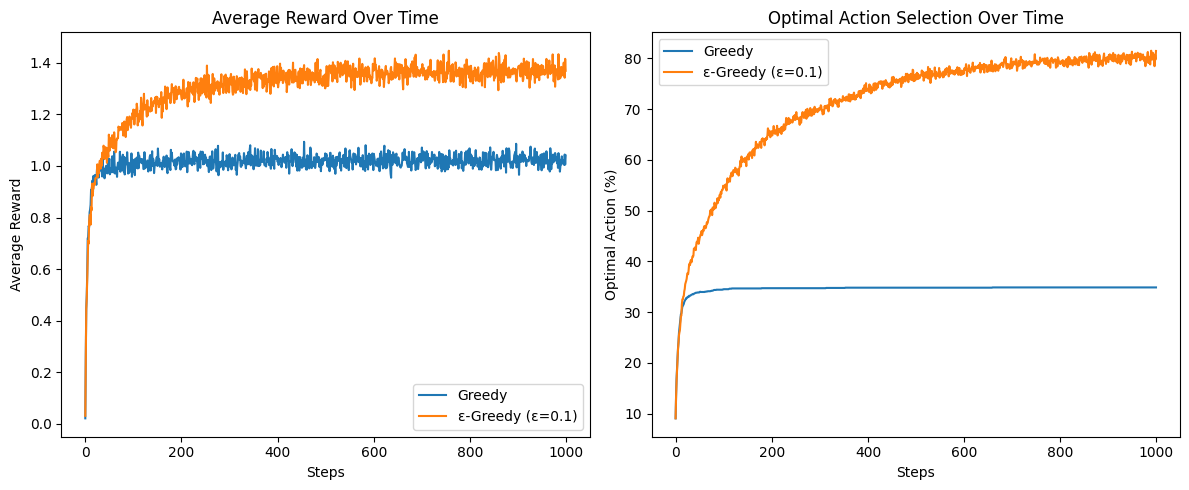

In [31]:
# 結果のプロット
plt.figure(figsize=(12, 5))

# 累積報酬の比較
plt.subplot(1, 2, 1)
plt.plot(rewards_greedy, label="Greedy")
plt.plot(rewards_eps, label=f"ε-Greedy (ε={epsilon})")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.legend()

# 最適行動選択率の比較
plt.subplot(1, 2, 2)
plt.plot(optimal_greedy * 100, label="Greedy")
plt.plot(optimal_eps * 100, label=f"ε-Greedy (ε={epsilon})")
plt.xlabel("Steps")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Selection Over Time")
plt.legend()

plt.tight_layout()
plt.show()